# Lab 4 Report
Jasmine Soh, Pamel Kang, Kevin Liaw

In [63]:
# import cell
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
import simpleaudio as sa

# Summary
In assignment 1 we implemented two signals, s1 and s0; then we convolved them to define y1 and y0; and finally extracted the correlation measurement. In assignment 2 we repeated the process using a noisy signal. For both assignments we graphed the signal vs time and convolution vs time to visualize. In assignment 3 we decoded a received message by reading in a CSV file where the data constituted to either a high or low signal (1 or 0). Then we converted the binary message to Ascii.

# Assignment 1 -- Matched Filter with Ideal Signals 

y1_corr: 1.0
y0_corr: -1.0


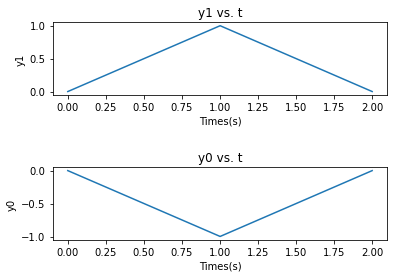

In [60]:
# Assignnment 1 - Matched Filer with Ideal Signals

# TODO: covolve a received signal with itself and with the template

# t: time vector
# returns vector that represents a unit step function
def u(t):
    return 1.0 * (t>0)

# t: time vector
# fs: sampling rate
# returns vector with impulse
def delta(t, fs):
    return fs * np.concatenate([[0], np.diff(u(t))])

fs = 8000
t = np.arange(0,1+1/fs, 1/fs)
s1 = u(t) - u(t-1)
s0 = -s1
y1 = np.convolve(s1,s1) / fs
y0 = np.convolve(s1,s0) / fs
t_y = np.arange(0,len(y1)/fs,1/fs)

fig1 = plt.figure(2)
fig1.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.plot(t_y,y1)
plt.title("y1 vs. t")
plt.xlabel("Times(s)")
plt.ylabel("y1")
plt.subplot(2,1,2)
plt.plot(t_y,y0)
plt.title("y0 vs. t")
plt.xlabel("Times(s)")
plt.ylabel("y0")

y1_corr = y1[1*fs+1]
y0_corr = y0[1*fs+1]
print("y1_corr:", y1_corr)
print("y0_corr:", y0_corr)

## Discussion
Computing convolution in reverse order does not matter because of convolution commutative property where x*h = h*x holds; thus plot will be the same.

# Assignment 2 -- Signal Decoding with a Matched Filter

yr1_corr: 0.9825187758507108
yr0_corr: -0.9825187758507108
1
0


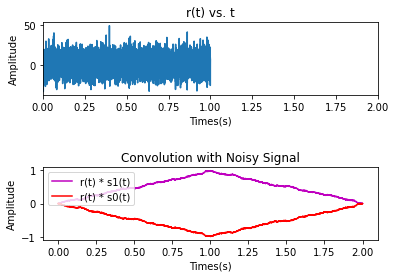

In [61]:
# Assignment 2: Signal Decoding with a Matched Filter

# Part A
# TODO: implement decode function
# r: input signal
# fs: sampling rate
# s0: 0-signal
# s1: 1-signal
# return: decoded symbol 0 or 1 based on correlation measurements
def decode(r,fs,s0,s1):
    y0 = np.convolve(r,s0) / fs
    y1 = np.convolve(r,s1) / fs
    y0_corr = y0[int(len(y0)/2)]
    y1_corr = y1[int(len(y1)/2)]
    if y1_corr > y0_corr:
        return 1
    else:
        return 0
    

# Part B
# TODO: create a received signal by adding s1 and random noise signal
n = np.random.normal(0,10,len(s1))
r = s1 + n
t_r = np.arange(0,len(r)/fs,1/fs)
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.plot(t_r,r)
plt.title("r(t) vs. t")
plt.xlabel("Times(s)")
plt.ylabel("Amplitude")
plt.xlim(0,2)

# Part C
# TODO: compute correlation measurements
yr1 = np.convolve(r,s1) / fs
yr0 = np.convolve(r,s0) / fs
t_yr = np.arange(0,len(yr1)/fs,1/fs)

plt.subplot(2,1,2)
plt.plot(t_yr,yr1,'m')
plt.plot(t_yr,yr0,'r')
plt.legend(['r(t) * s1(t)','r(t) * s0(t)'], loc=2)
plt.title("Convolution with Noisy Signal")
plt.xlabel("Times(s)")
plt.ylabel("Amplitude")

yr1_corr = yr1[int(len(yr1)/2)]
yr0_corr = yr0[int(len(yr0)/2)]
print("yr1_corr:", yr1_corr)
print("yr0_corr:", yr0_corr)

# Part D
print(decode(s1+n,fs,s0,s1))
print(decode(s0+n,fs,s0,s1))

## Discussion
We expect the correlation measurement between the new s1(t) and s0(t) to be less than when they were box signals because the width is 0.5 instead of 1; so the maximum overlapping area would be less than the box. The original s0(t) is more useful for communications because it has a greater correlation value.

# Assignment 3 -- Decipher Received Message

In [64]:
# Assignment 3: Decipher Received Message

# Part A,B,C
# TODO: read in a CSV file; create a vector of zeros that has same number of elements as rows;
# decode each time slice using for loop
file = open('receivedmsg.csv','rb')
rm = np.loadtxt(file, delimiter =',')

# Part B
# TODO: create a vector of zeros that has the same number of elements as rows
rm_rows = rm.shape[0]
message_bits = np.zeros(rm_rows)

# Part C
# TODO: decode each time slice using a for loop
for rows in range(0, rm_rows):
    r = rm[rows, :]
    message_bits[rows] = decode(r,fs,s0,s1)
    
# Part D
print('message_bits: ', message_bits)
print('Go Huskies!')

message_bits:  [0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
Go Huskies!
